# YOLOv10 to LiteRT using Google AI Edge for on-device object detection
This notebook is an implementation of converting the YOLOv10 object detection model to LiteRT (.tflite) format using Google AI Edge and deploy it on Android for on-device inference.

Developed by [Nitin Tiwari](https://linkedin.com/in/tiwari-nitin).

----
<a target="_blank" href="https://colab.research.google.com/github/NSTiwari/YOLOv10-LiteRT-Android/blob/main/YOLOv10_LiteRT.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#### **Pipeline:**

![Description of Image](https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/YOLOv10_LiteRT_Pipeline.png)

#### Step 1: Install dependencies

In [ ]:
!pip install ultralytics
!pip install ai-edge-model-explorer
!pip install ai-edge-litert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 40.9 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 MB 9.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.1 MB/s eta 0:00:00


#### Step 2: Import libraries

In [ ]:
from ultralytics import YOLO
from ai_edge_litert.interpreter import Interpreter
from google.colab import files

import model_explorer
import yaml
import json
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### Step 3: Convert YOLOv10n model to LiteRT (TF Lite)

In [ ]:
# Load the YOLOv10n model.
model = YOLO("yolov10n.pt")

# Export the model to LiteRT (TF Lite) format.
model.export(format="tflite")

100%|██████████| 5.59M/5.59M [00:00<00:00, 257MB/s]


Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,762,608 parameters, 0 gradients, 8.6 GFLOPs

PyTorch: starting from 'yolov10n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.6 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 166.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 137.1 MB/s eta 0:00:00
   ━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 114MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 37.25file/s]



ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 3.4s, saved as 'yolov10n.onnx' (9.1 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 62.0s, saved as 'yolov10n_saved_model' (23.8 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'yolov10n_saved_model/yolov10n_float32.tflite' (9.5 MB)

Export complete (64.7s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov10n_saved_model/yolov10n_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=yolov10n_saved_model/yolov10n_float32.tflite imgsz=640 data=None  
Visualize:       https://netron.app


'yolov10n_saved_model/yolov10n_float32.tflite'

Download a sample image or load your own image

--2024-09-24 11:37:03--  https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/test_image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 249405 (244K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>] 243.56K  --.-KB/s    in 0.004s  

2024-09-24 11:37:03 (52.9 MB/s) - ‘test_image.jpg’ saved [249405/249405]

--2024-09-24 11:37:03--  https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/test_image_2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

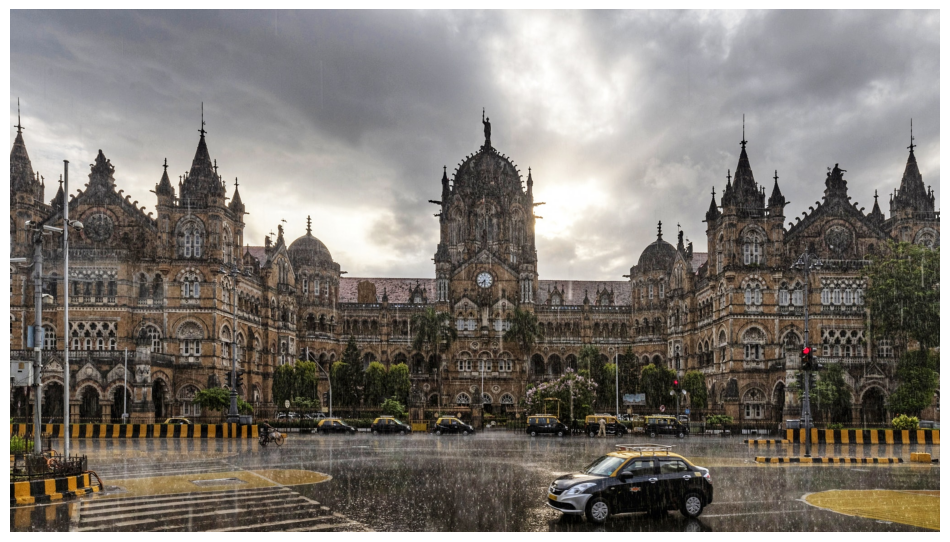

In [ ]:
# Download sample image and video.
!wget https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/test_image.jpg
!wget https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/test_image_2.jpg
!wget https://raw.githubusercontent.com/NSTiwari/YOLOv10-LiteRT-Android/main/assets/test_video.mp4

image = Image.open('test_image_2.jpg')

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
LITE_RT_EXPORT_PATH = "yolov10n_saved_model/" # @param {type : 'string'}
LITE_RT_MODEL = "yolov10n_float16.tflite" # @param {type : 'string'}

LITE_RT_MODEL_PATH = LITE_RT_EXPORT_PATH + LITE_RT_MODEL

# Load the exported TF Lite model.
litert_model = YOLO(LITE_RT_MODEL_PATH, task = 'detect')

# Input image.
image = 'test_image_2.jpg' # @param {type : 'string'}

# Perform inference on the input image.
result = litert_model(image)
result[0].show()

Loading yolov10n_saved_model/yolov10n_float16.tflite for TensorFlow Lite inference...

image 1/1 /content/test_image_2.jpg: 640x640 5 cars, 1 clock, 519.8ms
Speed: 15.1ms preprocess, 519.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


#### Step 4: Visualize the LiteRT model

In [ ]:
model_explorer.visualize(LITE_RT_MODEL_PATH)

ℹ️ Please re-run the cell in each new session

Loading extensions...
Loaded 8 extensions:
 - TFLite adapter (Flatbuffer)
 - TFLite adapter (MLIR)
 - TF adapter (MLIR)
 - TF adapter (direct)
 - GraphDef adapter
 - Pytorch adapter (exported program)
 - MLIR adapter
 - JSON adapter


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Step 5: Create labelmap

In [ ]:
metadata_file = "metadata.yaml" # @param {type : 'string'}
json_file = "labels.json" # @param {type : 'string'}

metadata_path = LITE_RT_EXPORT_PATH + metadata_file

with open(metadata_path, "r") as file:
    metadata = yaml.safe_load(file)

names = metadata.get("names", {})

with open(json_file, 'w') as file:
  json.dump(names, file, indent=2)

print("Labelmap created.")

Labelmap created.


#### Step 6: Inference the TF Lite model using LiteRT interpreter

In [ ]:
# Load the TF Lite model.
interpreter = Interpreter(model_path = LITE_RT_MODEL_PATH)
interpreter.allocate_tensors()

# Get input and output details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_size = input_details[0]['shape'][1]

print(f"Model input size: {input_size}")
print(f"Output tensor shape: {output_details[0]['shape']}")

Model input size: 640
Output tensor shape: [  1 300   6]


#### Step 7: Define utility functions

`load_labels`: Loads the `labels.json` file.

`load_image`: Loads the input image.

`detect`: Run the LiteRT model.

`postprocess_output`: Normalize the bounding box coordinates.

`generate_color_map`: Generates unique colors randomly for each label.

`inference_image`: Inference detection on images.

`inference_video`: Inference detection on videos.

In [ ]:
# Load labels.
def load_labels(label_file):
  with open(label_file, 'r') as file:
    return json.load(file)


# Load and preprocess image.
def load_image(image_path, input_size):
  image = cv2.imread(image_path)
  original_height, original_width = image.shape[:2]
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (input_size, input_size))
  image = image / 255.0
  return image, (original_height, original_width)


# Run inference.
def detect(input_data, is_video_frame=False):
    input_size = input_details[0]['shape'][1]

    if is_video_frame:
        original_height, original_width = input_data.shape[:2]
        image = cv2.cvtColor(input_data, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (input_size, input_size))
        image = image / 255.0
    else:
        image, (original_height, original_width) = load_image(input_data, input_size)

    interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image, axis=0).astype(np.float32))
    interpreter.invoke()

    output_data = [interpreter.get_tensor(detail['index']) for detail in output_details]
    return output_data, (original_height, original_width)



# Postprocess the output.
def postprocess_output(output_data, original_dims, labels, confidence_threshold):
  output_tensor = output_data[0]
  detections = []
  original_height, original_width = original_dims

  for i in range(output_tensor.shape[1]):
    box = output_tensor[0, i, :4]
    confidence = output_tensor[0, i, 4]
    class_id = int(output_tensor[0, i, 5])

    if confidence > confidence_threshold:
      x_min = int(box[0] * original_width)
      y_min = int(box[1] * original_height)
      x_max = int(box[2] * original_width)
      y_max = int(box[3] * original_height)

      label_name = labels.get(str(class_id), "Unknown")

      detections.append({
          "box": [y_min, x_min, y_max, x_max],
          "score": confidence,
          "class": class_id,
          "label": label_name
      })

  return detections


# Generate color map for labels.
def generate_color_map(labels):
  color_map = {}
  for label in labels.values():
      color_map[label] = [random.randint(0, 255) for _ in range(3)]
  return color_map


# Inference on image.
def inference_image(image_path, detections, color_map):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  for detection in detections:
    box = detection['box']
    label = detection['label']
    score = detection['score']
    color = color_map[label]

    y_min, x_min, y_max, x_max = box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)

    text = f'{label}: {score:.2f}'
    font_scale = 1
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 3)[0]

    label_start = (x_min, y_min - text_size[1] - 10)
    label_end = (x_min + text_size[0], y_min)

    cv2.rectangle(image, label_start, label_end, color, -1)

    text_position = (x_min, y_min - 5)
    cv2.putText(image, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 2)

  output_image_path = 'output_' + image_path
  output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image.
  plt.figure(figsize=(12, 8))
  plt.imshow(image)
  plt.axis('off')
  plt.show()

  return output_image


# Inference on video.
def inference_video(frame, detections, color_map, out):
    # Convert the frame to RGB for processing.
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    for detection in detections:
        box = detection['box']
        label = detection['label']
        score = detection['score']
        color = color_map[label]

        y_min, x_min, y_max, x_max = box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)

        text = f'{label}: {score:.2f}'
        font_scale = 0.5
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 3)[0]

        label_start = (x_min, y_min - text_size[1] - 10)
        label_end = (x_min + text_size[0], y_min)

        cv2.rectangle(image, label_start, label_end, color, -1)

        text_position = (x_min, y_min - 5)
        cv2.putText(image, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 1)

    output_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    out.write(output_image)

#### Step 8: Visualize the inference on image and video

In [ ]:
label_file = 'labels.json' # @param {type : 'string'}
input_type = 'image' # @param ['image', 'video']
image_path = 'test_image_2.jpg' # @param {type : 'string'}
video_path = 'test_video.mp4' # @param {type : 'string'}
confidence_threshold = 0.4 # @param {type : 'slider', min:0, max:1, step: 0.1}

labels = load_labels(label_file)
color_map = generate_color_map(labels)

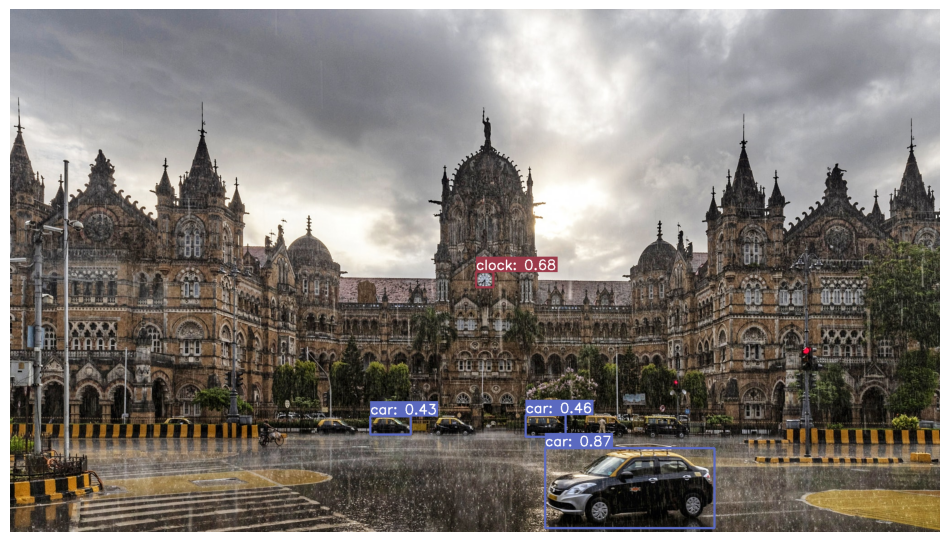

Image saved as output_test_image_2.jpg


In [ ]:
if input_type == 'image':
    output_data, original_dims = detect(image_path)
    detections = postprocess_output(output_data, original_dims, labels, confidence_threshold)
    output_img = inference_image(image_path, detections, color_map)
    output_image = 'output_' + image_path
    cv2.imwrite(output_image, output_img)
    print(f"Image saved as {output_image}")

else:
    cap = cv2.VideoCapture(video_path)
    output_video = 'output_' + video_path.replace('mp4', 'avi')
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        output_data, original_dims = detect(frame, is_video_frame=True)
        detections = postprocess_output(output_data, original_dims, labels, confidence_threshold)

        inference_video(frame, detections, color_map, out)

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Output video saved as {output_video}")

#### Step 9: Download output image and video (optional)

In [ ]:
# Download output image.
files.download(output_image)

# Download output video.
files.download(output_video)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Step 10: Download the LiteRT model

Download the exported LiteRT model for on-device deployment.

In [ ]:
files.download(LITE_RT_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>